# Linear Regression

Establish a linear relationship between the input variables(**X**) and single output variable(**Y**). 

<font color="green">**Simple Linear Regression**</font>
- When the input(**X**) is a single variable. 

<font color="green">**Multiple Linear Regression**.</font>
- When there are mutiple input variables(**X**)

## <font color="green">Simple Linear Regression</font>

### <font color="green">Model Representation</font>

In this problem we have an input variable - **X** and one output variable - **Y**. And we want to build linear relationship between these variables. We can define this linear relationship as follows:

\\[Y = \beta_0 + \beta_1X\\]

The \\(\beta_1\\) is called a scale factor or **coefficient** and \\(\beta_0\\) is called **bias coefficient**. This equation is similar to the line equation \\(y = mx + b\\) with \\(m = \beta_1\\)(Slope) and \\(b = \beta_0\\)(Intercept). So in this Simple Linear Regression model we want to draw a line between X and Y which estimates the relationship between X and Y.

We can find those coefficients  using different approaches. 

- **Ordinary Least Square Method** 

- **Gradient Descent Approach**. 

## <font color="green">**Ordinary Least Square Method**</font>

Model is,

\\[Y = \beta_0 + \beta_1X\\]

\\[\beta_1 = \frac{\sum_{i=1}^{m} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{m} (x_i - \bar{x})^2}\\]

\\[\beta_0 = \bar{y} - \beta_1\bar{x}\\]

In [1]:
# Importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0) # Specifying  figure size

In [2]:
# Reading Data
data = pd.read_csv('example1.csv')
data.head()

,Gender,Age Range,Size,Weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
# Collecting X and Y
X = data['Size'].values
Y = data['Weight'].values

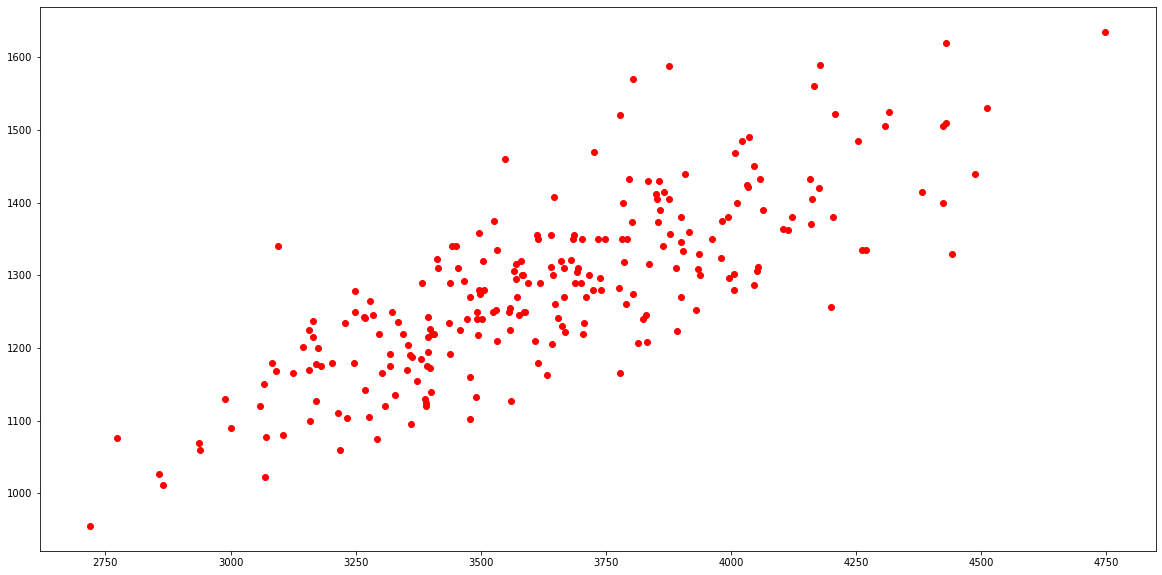

In [4]:
# Scatter plot of x/y
plt.scatter(X, Y, c='r', label='Scatter Plot') # here, c is color (you may use either 'r', 'red' or '#FF0000')
plt.show()

Now, lets implement the model,

$Y = \beta_0 + \beta_1X$

where,

\\[\beta_1 = \frac{\sum_{i=1}^{m} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{m} (x_i - \bar{x})^2}\\]

\\[\beta_0 = \bar{y} - \beta_1\bar{x}\\]
Note: $\bar{x}$ and $\bar{y}$ = mean of X and Y

In [5]:
# Calculating coefficient

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)

# Using the formula to calculate b1 and b0
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Printing coefficients
print(b1, b0)

0.26342933948939945 325.57342104944223


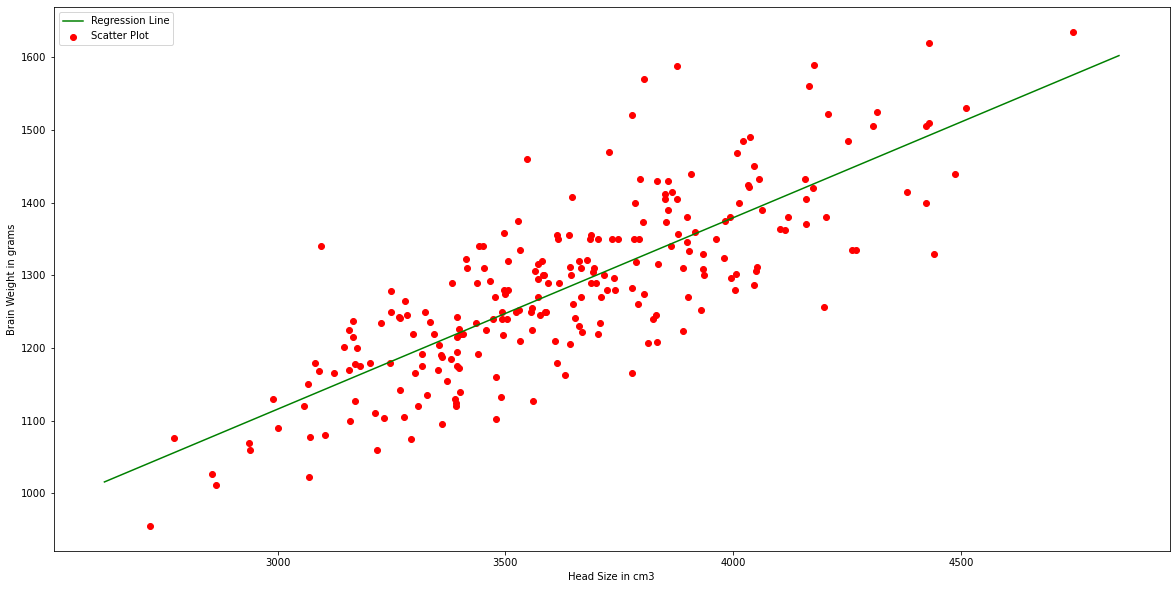

In [6]:
# Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='g', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='red', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

There are many methods to evaluate models. 
- **Root Mean Squared Error** 
- **Coefficient of Determination(\\(R^2\\) Score)**.

Root Mean Squared Error is the square root of sum of all errors divided by number of values, or Mathematically,

\\[RMSE = \sqrt{\sum_{i=1}^{m} \frac{1}{m} (y_i - \hat{y_i})^2}\\]

Here \\(\hat{y_i}\\) is the i<sup>th</sup> predicted output values. 

In [7]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]  # calculate y hat[i] the ith predicted output value
    rmse += (Y[i] - y_pred) ** 2 
rmse = np.sqrt(rmse/n)
print(rmse)

72.1206213783709


 \\(R^2\\) is defined as follows,

\\[SS_t = \sum_{i=1}^{m} (y_i - \bar{y})^2\\]

\\[SS_r = \sum_{i=1}^{m} (y_i - \hat{y_i})^2\\]

\\[R^2 \equiv 1 - \frac{SS_r}{SS_t}\\]

\\(SS_t\\) is the total sum of squares and \\(SS_r\\) is the total sum of squares of residuals.

\\(R^2\\) Score usually range from 0 to 1. It will also become negative if the model is completely wrong. Now we will find \\(R^2\\) Score.

In [8]:
# Calculating R2 Score# 
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]  # calculate y hat[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print(r2)

0.6393117199570003


### <font color="green">The scikit-learn Approach</font>

In [9]:
# Validation using Scikit Learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

print(X.shape)
# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((n, 1))
print(X.shape)

# Creating Model
reg = LinearRegression()

# Fitting training data
reg = reg.fit(X, Y)

# Y Prediction
Y_pred = reg.predict(X)

# Calculating RMSE and R2 Score
mse = mean_squared_error(Y, Y_pred)
r2_score = reg.score(X, Y)

print(np.sqrt(mse))
print(r2_score)

(237,)
(237, 1)
72.1206213783709
0.639311719957


## <font color="green">Multiple Linear Regression</font>

Multiple Linear Regression is a type of Linear Regression when the input has multiple features(variables).

### <font color="green">Model Representation</font>

Similar to Simple Linear Regression, we have input variable(**X**) and output variable(**Y**). But the input variable has \\(n\\) features. Therefore, we can represent this linear model as follows;

\\[Y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n\\]

\\(x_i\\) is the i<sup>th</sup> feature in input variable. By introducing \\(x_0 = 1\\), we can rewrite this equation.

\\[Y = \beta_0x_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n\\]

\\[x_0 = 1\\]

Now we can convert this eqaution to matrix form.

\\[Y = \beta^TX\\]

Where,

\\[\beta = \begin{bmatrix}\beta_0\\\beta_1\\\beta_2\\.\\.\\\beta_n\end{bmatrix}\\]

and

\\[X = \begin{bmatrix}x_0\\x_1\\x_2\\.\\.\\x_n\end{bmatrix}\\]

We have to define the cost of the model. Cost bascially gives the error in our model. **Y** in above equation is the our hypothesis(approximation). We are going to define it as our hypothesis function.

\\[h_\beta(x) = \beta^Tx = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n\\] 

And the cost is,

\\[J(\beta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\beta(x^{\textrm{(i)}}) - y^{\textrm{(i)}})^2\\]

We adjust $\beta_j$ to minimze the cost function $J(\beta)$. We use **Gradient Descent** for this.

### <font color="green">Gradient Descent</font>

Gradient Descent is an optimization algorithm. We will optimize our cost function using Gradient Descent Algorithm.


#### <font color="green">Step 1</font>
Initialize values \\(\beta_0\\), \\(\beta_1\\),..., \\(\beta_n\\) with some value. In this case we will initialize with 0.

#### <font color="green">Step 2</font>

Iteratively update,

\\[\beta_j := \beta_j - \alpha\frac{\partial}{\partial \beta_j} J(\beta)\\]

until it converges.

This is the procedure. Here \\(\alpha\\) is the learning rate. This operation \\(\frac{\partial}{\partial \beta_j} J(\beta)\\) means we are finding partial derivate of cost with respect to each \\(\beta_j\\). This is called Gradient.


In step 2 we are changing the values of \\(\beta_j\\) in a direction in which it reduces our cost function. And Gradient gives the direction in which we want to move. Finally we will reach the minima of our cost function. But we don't want to change values of \\(\beta_j\\) drastically, because we might miss the minima. That's why we need learning rate.

But we still didn't find the value of \\(\frac{\partial}{\partial \beta_j} J(\beta)\\). After we applying the mathematics. The step 2 becomes.

\\[\beta_j \leftarrow \beta_j - \alpha\frac{1}{m}\sum_{i=1}^m (h_\beta(x^{(i)})-y^{(i)})x_{j}^{(i)}\\]

We iteratively change values of \\(\beta_j\\) according to above equation. This particular method is called **Batch Gradient Descent**.

In [10]:
data = pd.read_csv('example2.csv')
print(data.shape)
data.head()

(1000, 3)


,Speaking,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


## <font color="green">Predict the score of writing exam from speaking and reading scores</font>

<font color="green">Store scores to an array.</font>

In [11]:
speak = data['Speaking'].values
read = data['Reading'].values
write = data['Writing'].values

<font color="green">Generate our X, Y and \\(\beta\\).</font>

In [12]:
m = len(speak)
x0 = np.ones(m)
X = np.array([x0, speak, read]).T
# Initial Coefficients
B = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001

Define Cost Function $J(\beta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\beta(x^{\textrm{(i)}}) - y^{\textrm{(i)}})^2$

In [13]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m) 
    return J

In [14]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)

2470.11


As you can see initial cost is huge. 

**<font color="green" size=5>Reduce it periodically using Gradient Descent. The steps are given below </font>**

**<font color="green">Hypothesis:  \\(h_\beta(x) = \beta^Tx\\)</font>**

**<font color="green">Loss: \\((h_\beta(x)-y)\\)</font>**

**<font color="green">Gradient: \\((h_\beta(x)-y)x_{j}\\)/m</font>**

**<font color="green">Gradient Descent Updation: \\(\beta_j := \beta_j - \alpha(h_\beta(x)-y)x_{j})\\)</font>**

**<font color="red" size=3>  Daniel Harnden's Code:</font>**

In [15]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Calculate Hypothesis Values
        hypothesis = X.dot(B)
        
        # Calculate Loss function
        loss = hypothesis - y
        
        # Calculate Gradient 
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

**<font color="green" size=5>Compute and print the final value of \\(\beta\\)</font>**

<font color="green">$\beta_j \leftarrow \beta_j - \alpha\frac{1}{m}\sum_{i=1}^m (h_\beta(x^{(i)})-y^{(i)})x_{j}^{(i)}$</font>


**<font color="red" size=3>  Daniel Harnden's Code:</font>**

In [16]:
iterations = 100000
# call the gradient_descent function you created above (note: it returns two values)
newB, cost_history = gradient_descent(X, y, B, alpha, iterations)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

[424.37092179   5.20456773   7.15659579]
29051.596449579352


**<font color="green" size=5>Calculate RMSE and \\(R^2\\) Score of your model to evaluate.  </font>**


**<font color="red" size=3>  Daniel Harnden's Code:</font>**

In [17]:
Y_pred = X.dot(newB)

# Calculate rmse
rmse = np.sqrt(mean_squared_error(Y, Y_pred))

# Calculate r2_score
ss_tot = 0
ss_res = 0
n = len(X)
mean_y = np.mean(Y)

for i in range(n):
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2_score = 1 - (ss_res/ss_tot)

# print rmse
print(rmse)
# print r2_score
print(r2_score)

1216.6219333497893
-5701.287037465854


**<font color="green" size=5>Now implement this model using scikit-learn.</font>**


### <font color="green">The scikit-learn Approach</font>

<font color="green">scikit-learn approach is very similar to Simple Linear Regression Model.</font>


**<font color="red" size=3>  Daniel Harnden's Code:</font>**

In [18]:
# Creating Model
mulReg = LinearRegression()

# Fitting training data
mulReg = mulReg.fit(X, Y)

# Y Prediction
Y_pred = mulReg.predict(X)

# Calculating RMSE and R2 Score
mse = mean_squared_error(Y, Y_pred)
r2_score = mulReg.score(X, Y)

print(np.sqrt(mse))
print(r2_score)

4.572887051836439
0.9098901726717316


## <font color="green">Regularized Regression</font>

In [19]:
# import sklearn's diabetes dataset for regression (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# load the dataset; returns data (X) and target (y)
diabetes, target = load_diabetes(return_X_y=True)
diabetes = pd.DataFrame(diabetes)

diabetes.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [20]:
# Separate data and target to X and y
X = diabetes
y = target

**<font color="green" size=3>Split the data using train_test_split.</font>**


**<font color="red" size=3>  Daniel Harnden's Code:</font>**

In [21]:
# set up training and test data (test size = 0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25);

In [22]:
# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
from sklearn.model_selection import cross_val_score

# get r2 cross validation scores (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
    
print(scores)
print('Mean: ', np.mean(scores)) 
print('Standard deviation: ', np.std(scores))  

[0.53035999 0.33454336 0.5235947  0.43969503 0.6096721 ]
Mean:  0.4875730346768347
Standard deviation:  0.09353806765981111


### <font color="green">Ridge Regression</font>

In [24]:
from sklearn.linear_model import Ridge

# Train model with default alpha=1
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

# get cross val scores
scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')

print(scores)
print('Mean: ', np.mean(scores)) 
print('Standard deviation: ', np.std(scores))  

[0.40986899 0.29669628 0.42730118 0.43367512 0.4228954 ]
Mean:  0.398087393500748
Standard deviation:  0.05129197490659815


### <font color="green">Let's see if we can improve the \\(R^2\\) score by adjusting the value of alpha using [grid search](https://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624)</font>

In [25]:
# find optimal alpha with grid search
from sklearn.model_selection import GridSearchCV

# some possible values for alpha 
#alpha = [1e-12, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]

**<font color="green" size=3>Play with the parameters for GridSearchCV for different values of alpha.</font>**


**<font color="red" size=3>  Daniel Harnden's Code:</font>**

In [26]:
grid = GridSearchCV(estimator=ridge, param_grid={'alpha':[1e-12, 0.01, 1, 100, 10000000]}, scoring='r2', n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# Now import the results into a dataframe 
df = pd.DataFrame(grid.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021876,0.007654,0.000000,0.000000,0.0,{'alpha': 1e-12},0.530360,0.334543,0.523595,0.439695,0.609672,0.487573,0.093538,2
1,0.021474,0.007191,0.000000,0.000000,0.01,{'alpha': 0.01},0.528804,0.336219,0.522995,0.463789,0.605908,0.491543,0.089836,1
2,0.003125,0.006251,0.006251,0.007656,1,{'alpha': 1},0.409869,0.296696,0.427301,0.433675,0.422895,0.398087,0.051292,3
3,0.003125,0.006251,0.006251,0.007656,100,{'alpha': 100},0.017298,-0.037187,-0.067479,-0.001282,0.010996,-0.015531,0.032100,4
4,0.006250,0.007654,0.003125,0.006250,10000000,{'alpha': 10000000},-0.000022,-0.054372,-0.089570,-0.022060,-0.005964,-0.034398,0.033422,5


### <font color="green">We do not need so many columns. We are only interested to know how the mean test score varies with different values of alpha. Lets look at those two columns.</font>

In [27]:
df[['param_alpha', 'mean_test_score']]

,param_alpha,mean_test_score
0,0.0,0.487573
1,0.01,0.491543
2,1,0.398087
3,100,-0.015531
4,10000000,-0.034398


### <font color="green">Find the best score and the best parameter (alpha value) for that score.</font>

In [28]:
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.491543213273717
Best Params:  {'alpha': 0.01}
